<a href="https://colab.research.google.com/github/feelzoo/eelzoo-Ecommerce_Freeshipping_Threshold_Shipping_Rates_ROI/blob/main/AOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Follow-up on Free Shipping Threshold & Shipping Rates for Ecommerce**

## I perfomred a statistical analysis for the effect of our new shipping plans on our ecommerce business. 

# 1. **Background**
Our company made two major changes on our shipping plan as below in order to not only cover the soaring supply chain costs but also increase Average Order Value while maintaining customer satisfaction.

**Previous plan: \$50 threshold for free standard shipping / \$5 standard shipping free for orders under \$50**<br>
**New plan: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;\$75 threshold for free standard shipping/ \$5.95 standard shipping price for orders under $75**

I conducted a data anlaysis to examine the effect of our new plan on our AOV and conversion rate since these two metrics are highly correlated with shipping methods and rates

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.animation as ani
from scipy.stats import ttest_ind
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pd.set_option('display.max_rows',10,'display.max_columns',None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/NADRI/Shopify_Order_Product_Returns' 

Mounted at /content/gdrive


In [3]:
order1 = f'{root_path}/orders_export_2.csv'
order2 = f'{root_path}/orders_export_1 2.csv'

orders_all = pd.concat(map(pd.read_csv,[order1,order2]),ignore_index = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (45,71) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,


In [4]:
def year_month(data):
    data['year'] = ''
    data['month'] = ''
    for index, row in data.iterrows():
        try: 
            year = str(row['Created at']).split('-')[0]
            month = str(row['Created at']).split('-')[1]
        except: 
            year = '0'
            month = '0'
        data.at[index,'year'] = year
        data.at[index,'month'] = month

#2. **Dataset**
Year-over-year Shopify order data was used to mitigate seasonality. 


In [5]:
year_month(orders_all)

In [6]:
#Slice data for January 2021
jan_feb_2020 = orders_all[(((orders_all['year'] == '2020') & (orders_all['month'] == '01'))| ((orders_all['month'] =='02') & (orders_all['year'] == '2020'))) & (orders_all['Name'] != 'N8350')]
jan_2021 = orders_all[(orders_all['year'] == '2021') & (orders_all['month'] == '01') & (orders_all['Name'] != 'N8350')]
jan_feb_2021 = orders_all[(((orders_all['year'] == '2021') & (orders_all['month'] == '01'))| ((orders_all['month'] =='02') & (orders_all['year'] == '2021'))) & (orders_all['Name'] != 'N8350')]
#Group Name,Total,Quantity for January 2021
jan_feb_2020_group = jan_feb_2020.groupby(['Name','Total'])['Lineitem quantity'].sum().reset_index()
jan_2021_group = jan_2021.groupby(['Name','Total'])['Lineitem quantity'].sum().reset_index()
jan_feb_2021_group = jan_feb_2021.groupby(['Name','Total'])['Lineitem quantity'].sum().reset_index()

In [7]:
#Compute total revenue and AVO for January&February 2020
avg_2020_jan_feb = jan_feb_2020_group['Total'].sum()/len(jan_feb_2020_group)
total_2020_jan_feb = jan_feb_2020_group['Total'].sum()

#Compute total revenue and AOV for January 2021
avg_2021_jan = jan_2021_group['Total'].sum()/len(jan_2021_group)
total_2021_jan = jan_2021_group['Total'].sum()

#Compute total revenue and AVO for January&February 2021
avg_2021_jan_feb = jan_feb_2021_group['Total'].sum()/len(jan_feb_2021_group)
total_2021_jan_feb = jan_feb_2021_group['Total'].sum()

In [8]:
#Import data for January 2022
recent_data = pd.read_csv(root_path+'/2022_Jan_Feb_6.csv')
recent_data2 = pd.read_csv(root_path+'/2022_Jan_Feb.csv')
#Split date into year and month
year_month(recent_data)
year_month(recent_data2)

#Group data into Name,total,quantity
recent_group = recent_data.groupby(['Name','Total'])['Lineitem quantity'].sum().reset_index()
recent_group2 = recent_data2.groupby(['Name','Total'])['Lineitem quantity'].sum().reset_index()

In [9]:
#Compute total revenue and AOV for January 2022
avg_2022_jan = recent_group['Total'].sum()/len(recent_group)
total_2022_jan = recent_group['Total'].sum()

#Compute total revenue and AOV for January & February 2022
avg_2022_jan_feb = recent_group2['Total'].sum()/len(recent_group2)
total_2022_jan_feb = recent_group2['Total'].sum()

## a. **Financial Growth (AOV and Revenue) in 2021 vs 2022**

In [249]:
stats= pd.DataFrame(columns = ['year','AOV','Revenue'] , data = [[2021,avg_2021_jan_feb,total_2021_jan_feb],[2022,avg_2022_jan_feb,total_2022_jan_feb]])

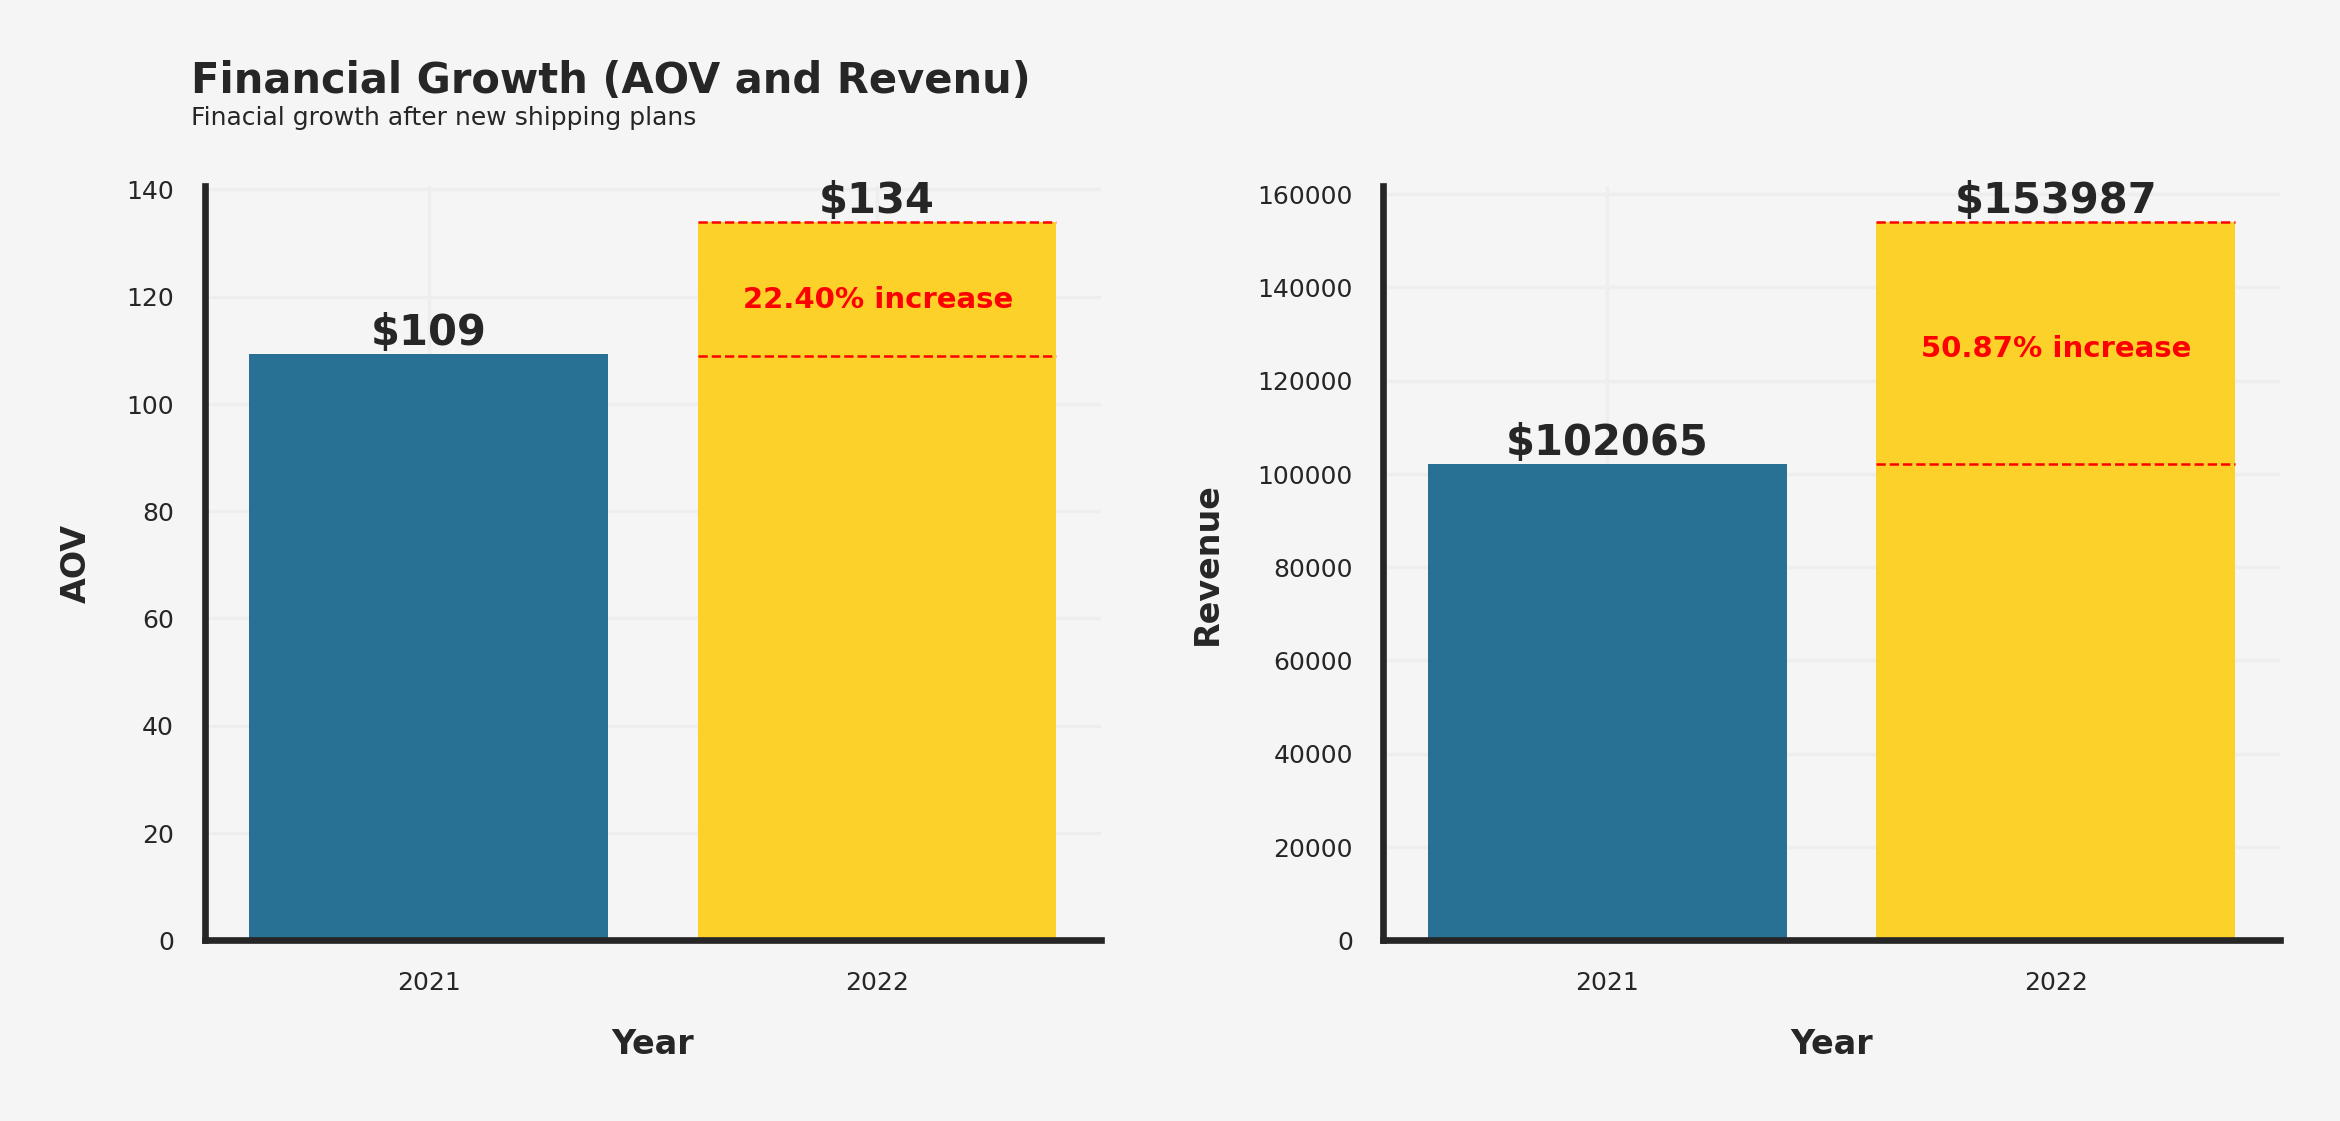

In [276]:
plt.rcParams['figure.dpi'] = 600
colors = ['#287094','#fcd12a']
fig = plt.figure(figsize= (4,2),facecolor =  '#f6f5f5')
background = '#f6f5f5'

location = 0 
for col in stats.columns[1:]:
  plt.subplot(1,2,location+1)
  ax = sns.barplot(data=stats, x='year',y=col,palette=colors, alpha=1,saturation =1, zorder =2,linewidth = 0)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.set_facecolor(background)
  ax.grid(which = 'major',axis = 'x',zorder= 0, color='#EEEEEE',linewidth=.4)
  ax.grid(which = 'major',axis = 'y',zorder= 0, color='#EEEEEE',linewidth=.4)
  ax.set_xlabel('Year',fontsize = 4,fontweight='bold')
  ax.set_ylabel(col,fontsize = 4,fontweight='bold')
  ax.tick_params(labelsize=3,width=.5,length=.15)
  if col =='AOV':
    ax.text(-0.53,158,'Financial Growth (AOV and Revenu)',fontsize = 5,fontweight = 'bold')
    ax.text(-0.53,152,'Finacial growth after new shipping plans',fontsize = 3)
    ax.axhline(xmin =.55 ,xmax=.95 ,y=109,color='r',linewidth=.3,linestyle='dashed')
    ax.axhline(xmin =.55 ,xmax=.95 ,y=134,color='r',linewidth=.3,linestyle='dashed')
    ax.text(.7,118,'22.40% increase',fontsize=3.5,color='r',fontweight='bold')
  if col == 'Revenue':
    ax.axhline(xmin =.55 ,xmax=.95 ,y=102065,color='r',linewidth=.3,linestyle='dashed')
    ax.axhline(xmin =.55 ,xmax=.95 ,y=153987,color='r',linewidth=.3,linestyle='dashed')
    ax.text(.7,125000,'50.87% increase',fontsize=3.5,color='r',fontweight='bold')
  for p in ax.patches:
    value = f'${p.get_height():.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.text(x,y,value,fontsize = 5,fontweight='bold',ha='center',va='bottom')
    
  location=+1
plt.tight_layout()



## Is this difference in AOV statistically significant?

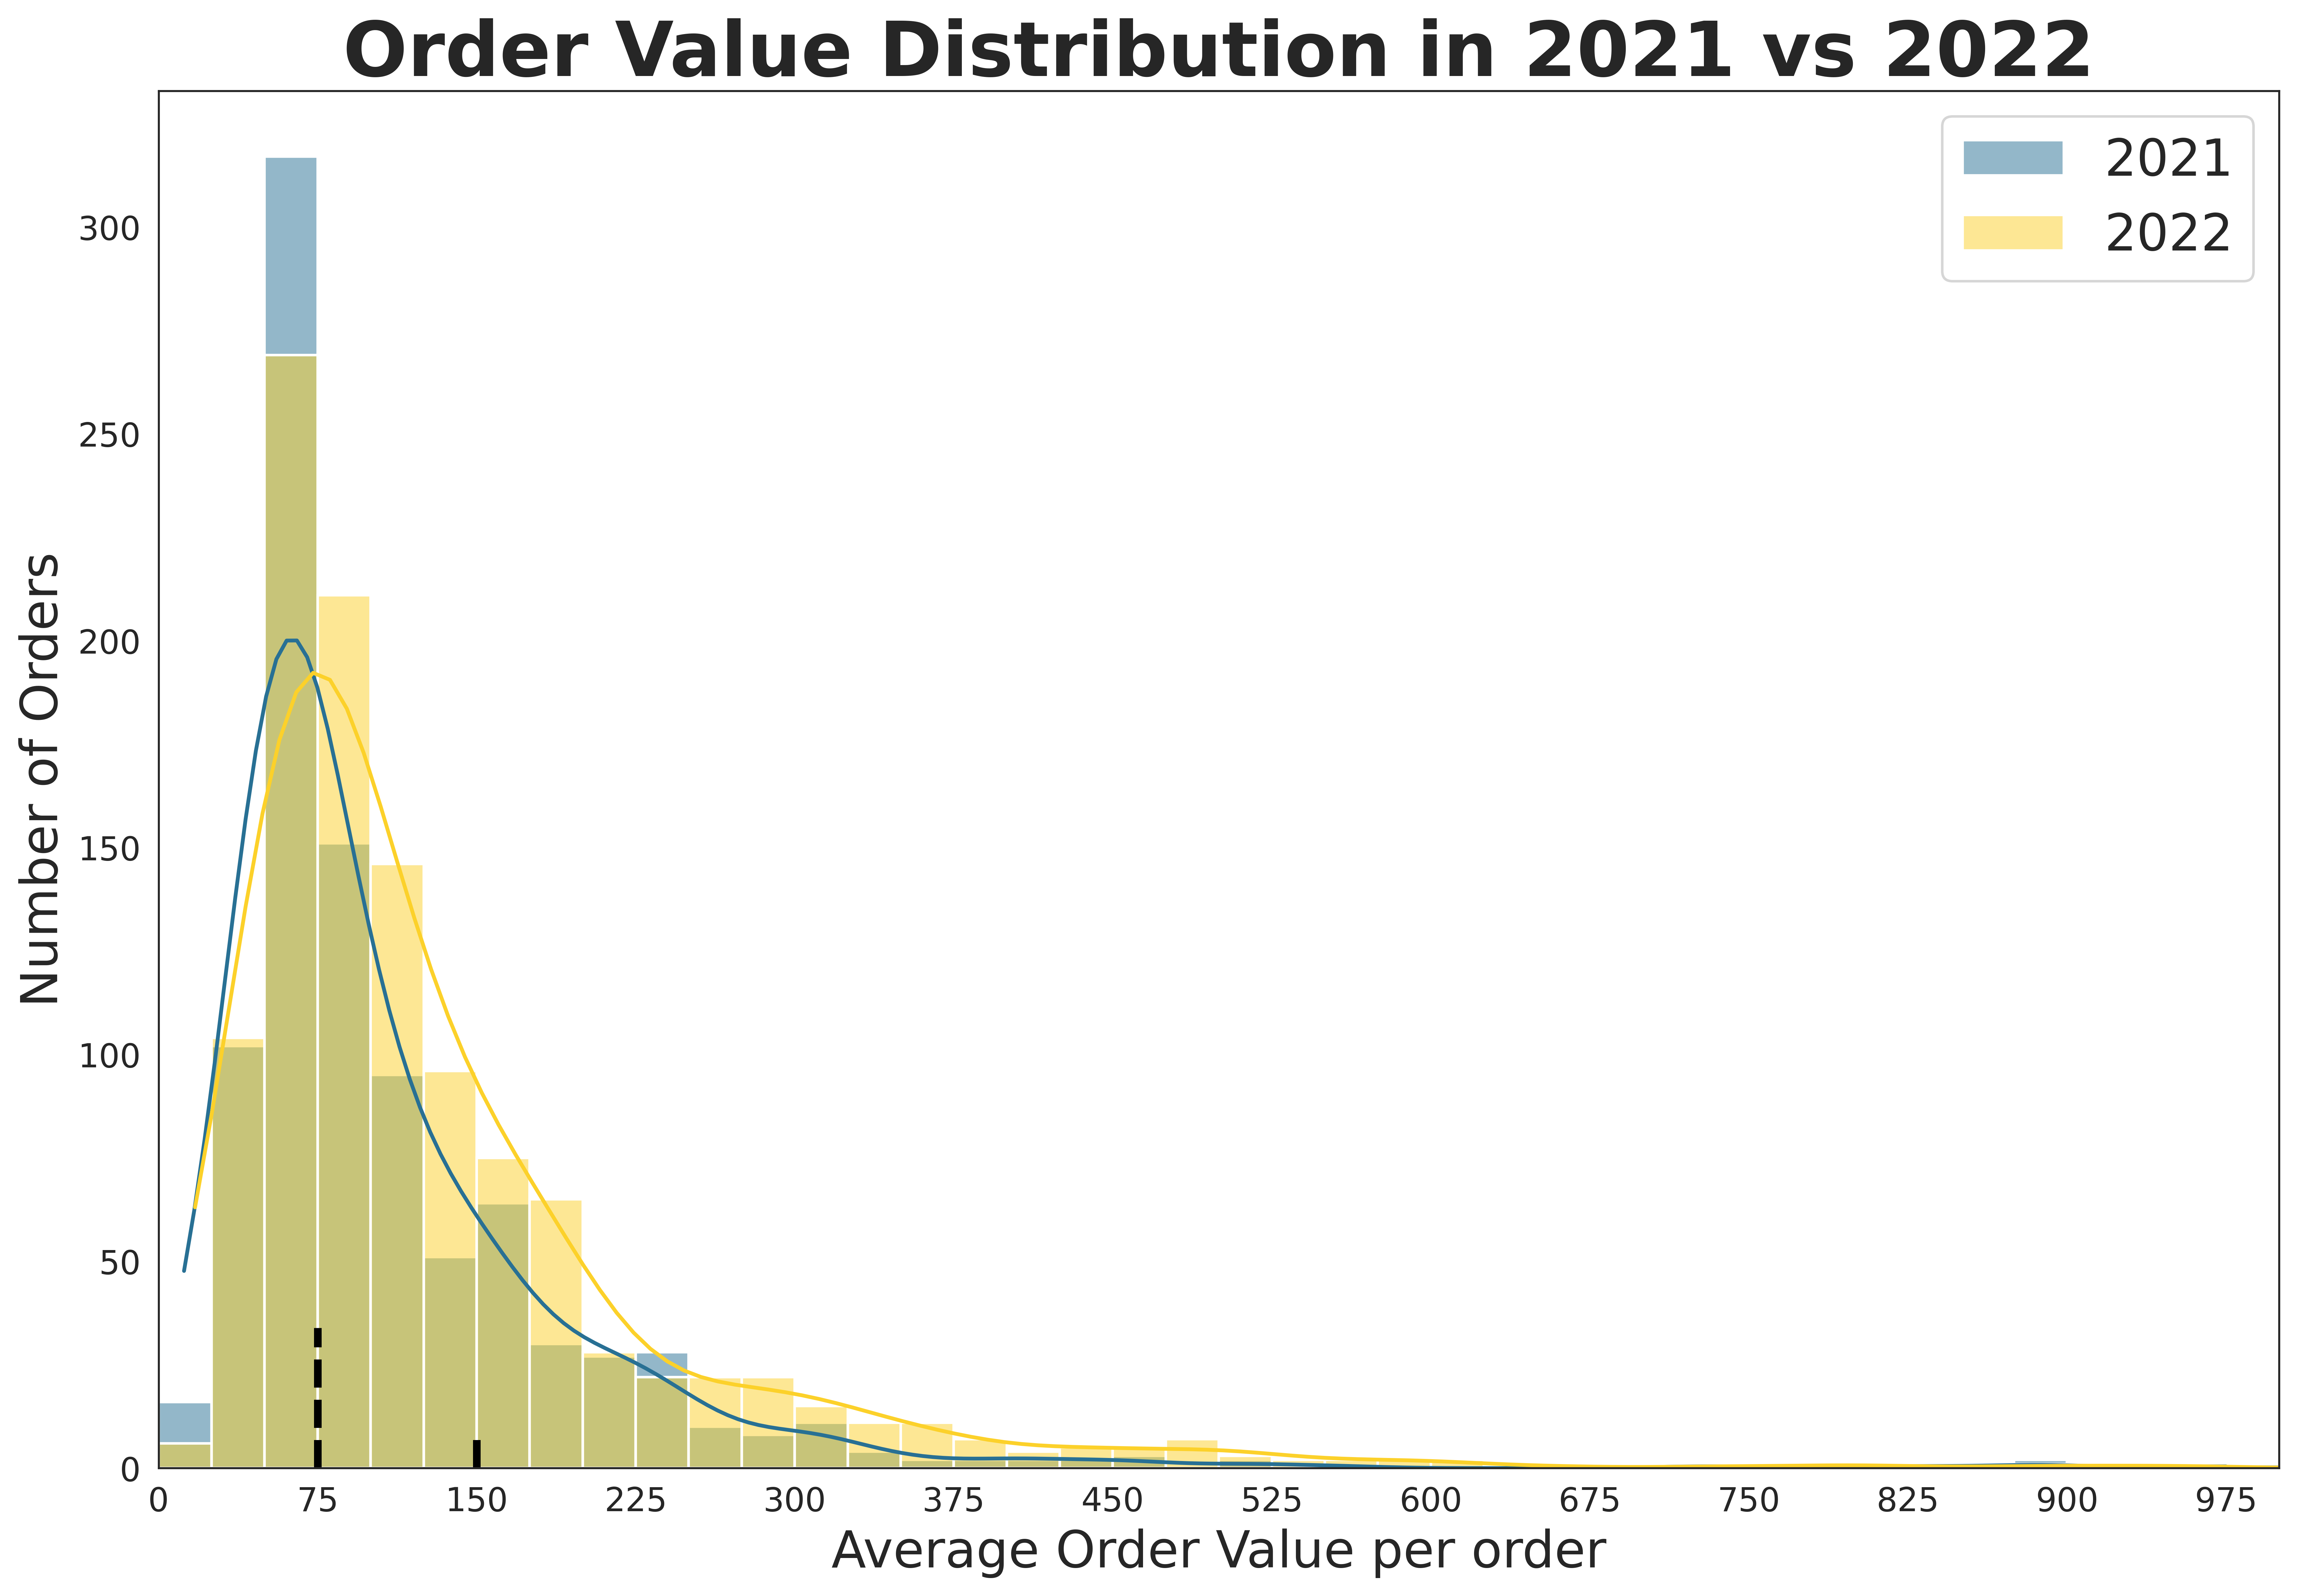

In [284]:
figure = plt.figure(figsize = (15,10))
ax = plt.subplot()
sns.set_style('white')
sns.histplot(old,alpha = 0.5,label='2021',color = '#287094',kde=True, binrange = (0,1000),bins=40)
sns.histplot(new,alpha = 0.5,label='2022',color = '#fcd12a',kde=True,binrange = (0,1000),bins=40)
plt.legend(prop={'size':20})
plt.title('Order Value Distribution in 2021 vs 2022',fontsize = 30,fontweight='bold')
plt.xlabel('Average Order Value per order',fontsize = 20)
plt.ylabel('Number of Orders',fontsize = 20)
plt.xticks(np.arange(0,1000,50),fontsize = 13)
plt.xlim(0,1000)
plt.xticks(np.arange(0,1000,75),fontsize = 13)
plt.vlines(75,ymin=0,ymax=33.9,colors='black',linestyles = 'dashed', linewidth = 3)
plt.vlines(150,ymin = 0,ymax = 8.3, colors='black',linestyles='dashed',linewidth = 3)
plt.yticks(fontsize = 13)
plt.savefig('average_order_value_2021_2022_count.png')

In [285]:
figure = plt.figure(figsize = (15,10))
ax = plt.subplot()
sns.set_style('white')
sns.histplot(old,alpha = 0.5,label='2021',color = '#287094',kde=True, binrange = (0,1000),bins=40,stat = 'percent')
sns.histplot(new,alpha = 0.5,label='2022',color = '#fcd12a',kde=True,binrange = (0,1000),bins=40,stat = 'percent')
plt.legend(prop={'size':20})
plt.title('Order Value Distribution January in 2021 vs 2022',fontsize = 30,fontweight='bold')
plt.xlabel('Order Value per order',fontsize = 20)
plt.ylabel('Percentage of Orders (%)',fontsize = 20)
plt.xticks(np.arange(0,1000,50),fontsize = 13)
plt.xlim(0,1000)
plt.xticks(np.arange(0,1000,75),fontsize = 13)
plt.vlines(75,ymin=0,ymax=33.9,colors='black',linestyles = 'dashed', linewidth = 3)
plt.vlines(150,ymin = 0,ymax = 8.3, colors='black',linestyles='dashed',linewidth = 3)
plt.yticks(fontsize = 13)
plt.savefig('average_order_value_2021_2022_percent.png')

In [292]:
figure = plt.figure(figsize = (15,13))
ax = plt.subplot()
sns.set_style('white')
sns.histplot(old2,alpha = 0.5,label='2021',color = '#287094',kde=True, binrange = (0,1000),bins=40)
sns.histplot(new2.drop(1025),alpha = 0.5,label='2022',color = '#fcd12a',kde=True,binrange = (0,1000),bins=40)
plt.legend(prop={'size':20})
plt.title('Order Value Distribution 2021 vs 2022',fontsize = 30,fontweight='bold')
plt.xlim(0,500)
plt.xlabel('Order Value per order',fontsize = 20)
plt.ylabel('Number of Orders',fontsize = 20)
plt.yticks(fontsize = 13)
plt.savefig(f'{root_path}/average_order_value_2021_2022_count2_zoom.png')

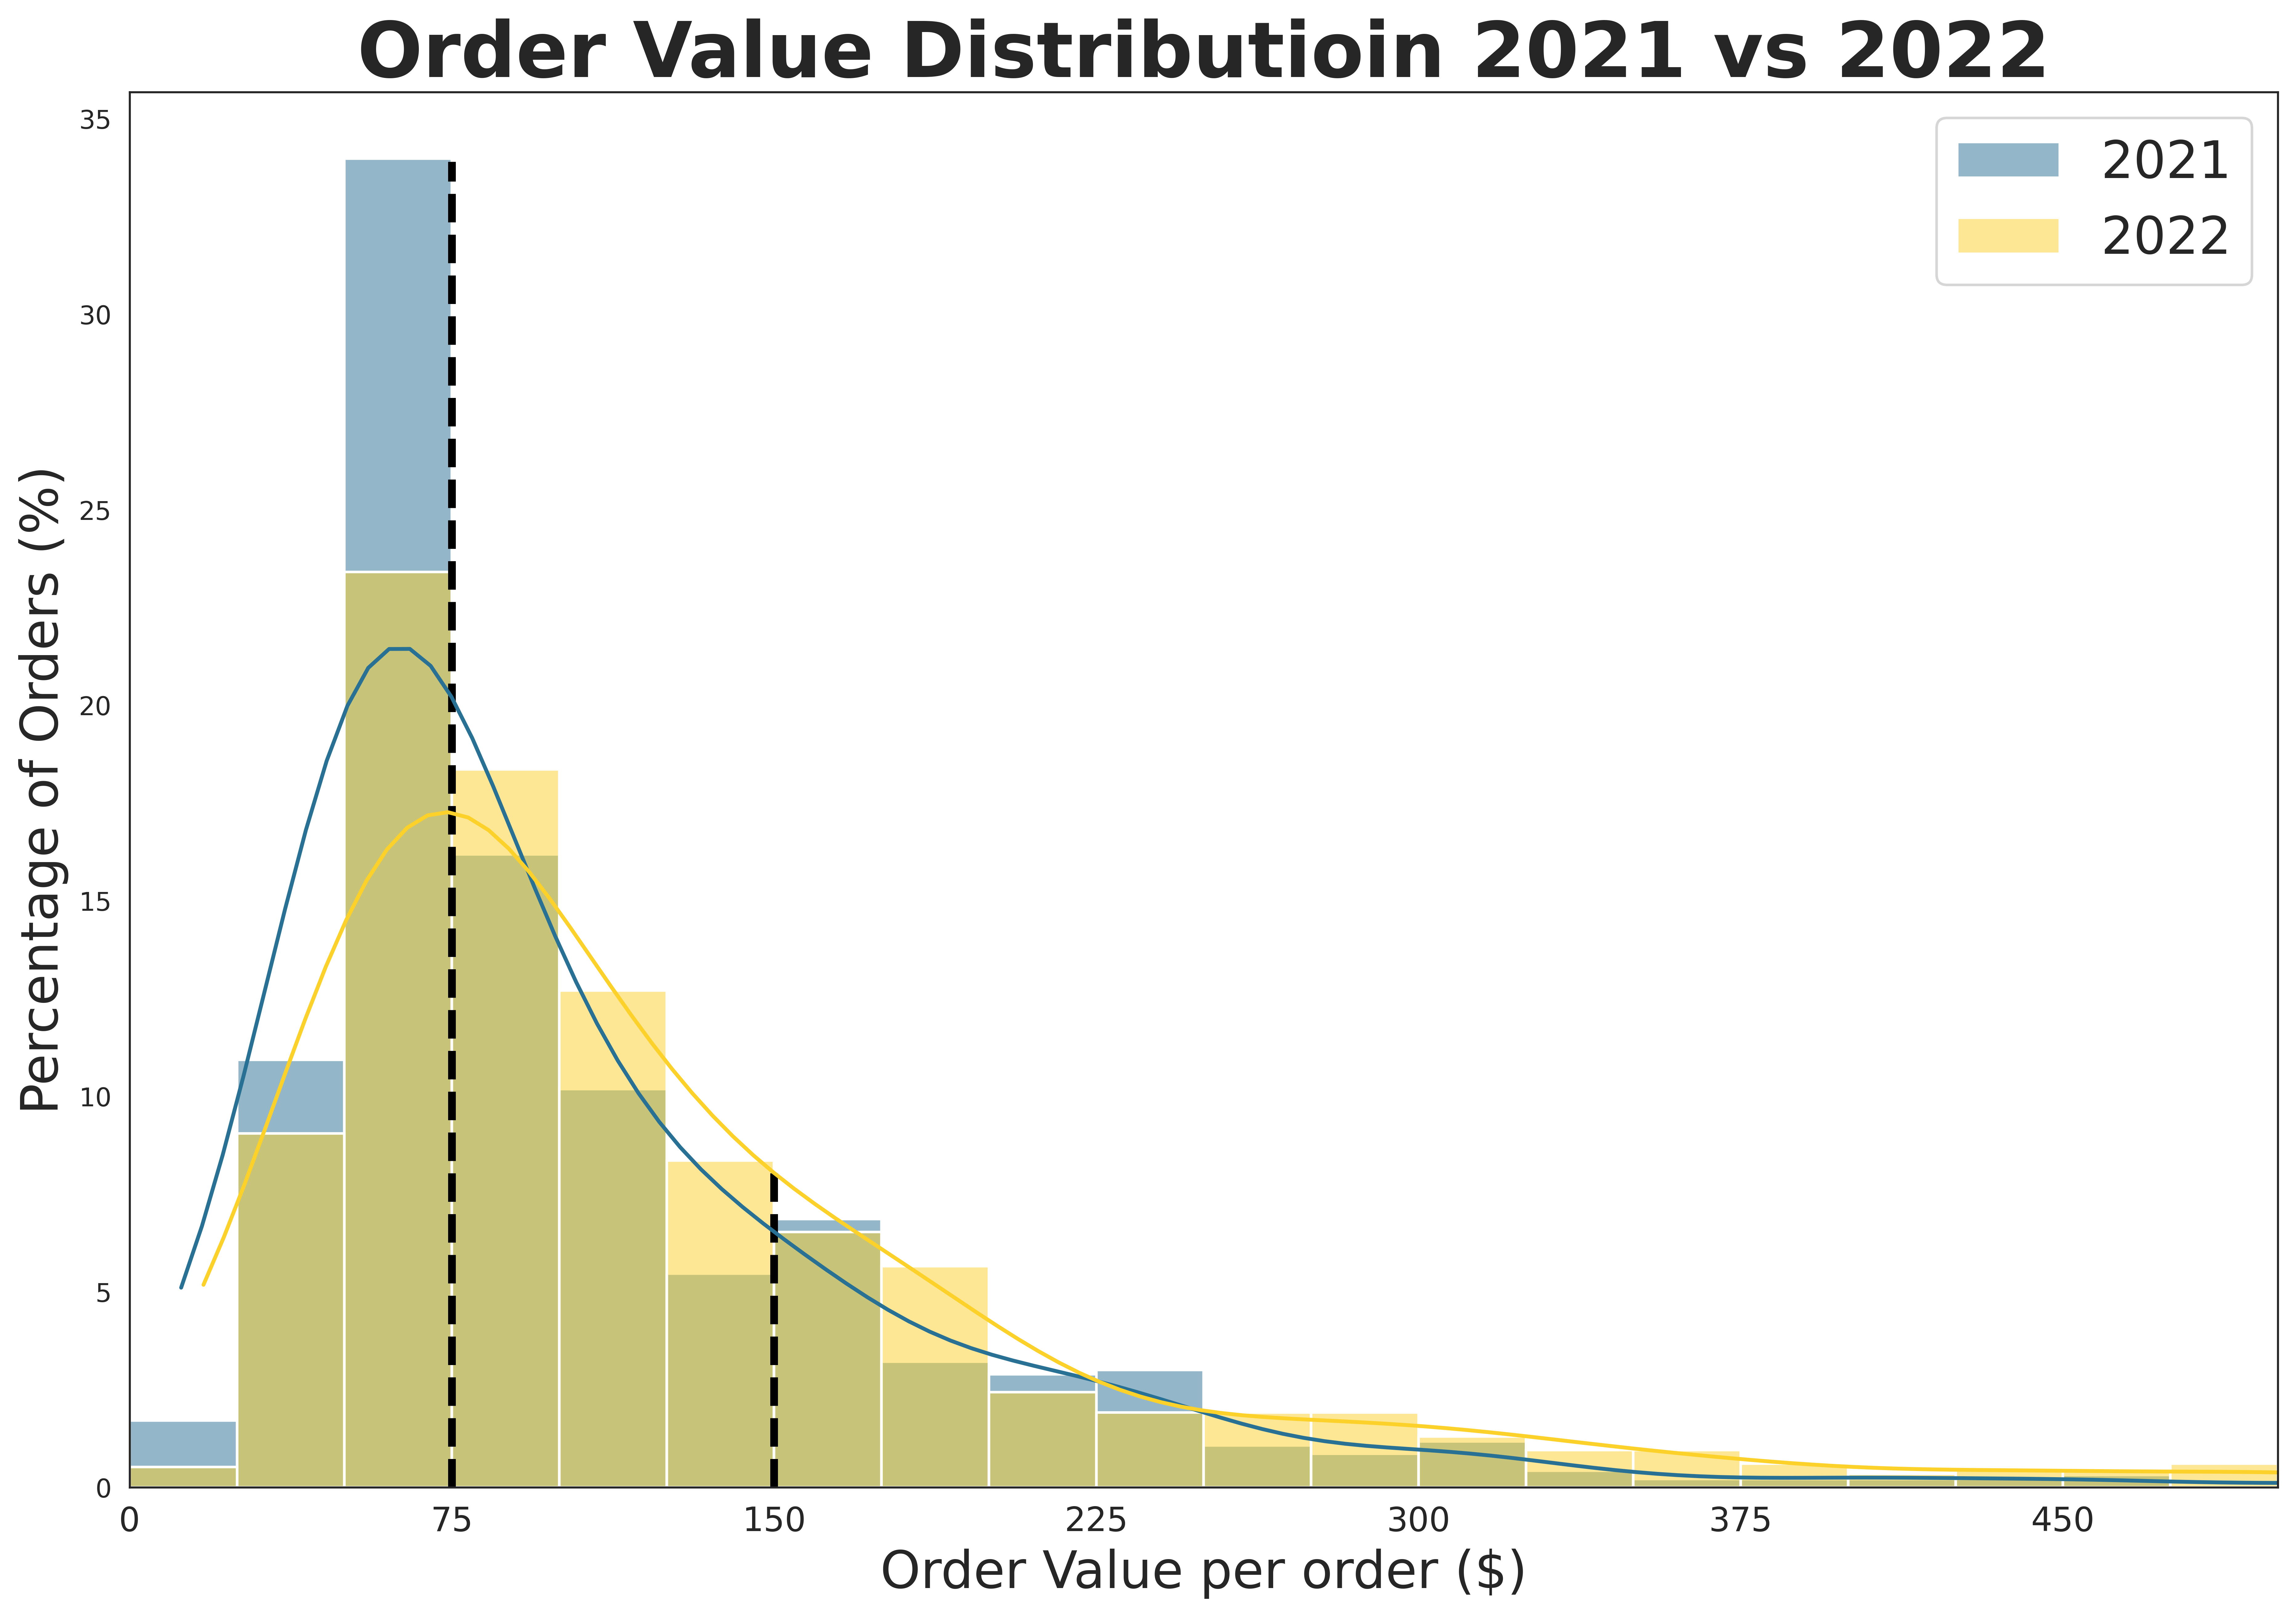

In [293]:
figure = plt.figure(figsize = (15,10))
ax = plt.subplot()
sns.set_style('white')
sns.histplot(old2,alpha = 0.5,label='2021',color = '#287094',kde=True, binrange = (0,1000),bins=40,stat = 'percent')
sns.histplot(new2.drop(1025),alpha = 0.5,label='2022',color = '#fcd12a',kde=True,binrange = (0,1000),bins=40,stat = 'percent')
plt.legend(prop={'size':20})
ax.set_title('Order Value Distributioin 2021 vs 2022',fontsize = 30,fontweight='bold')
plt.xlabel('Order Value per order ($)',fontsize = 20)
plt.ylabel('Percentage of Orders (%)',fontsize = 20)
plt.xlim(0,500)
plt.xticks(np.arange(0,500,75),fontsize=13)
plt.vlines(75,ymin=0,ymax=33.9,colors='black',linestyles = 'dashed', linewidth = 3)
plt.vlines(150,ymin = 0,ymax = 8.3, colors='black',linestyles='dashed',linewidth = 3)
plt.savefig(f'{root_path}/average_order_value_2021_2022_percent2_zoom.png')

In [299]:
pd_new = pd.DataFrame(np.array(new2),columns = ['order_value'])

In [300]:
pd_new

order_value
0           53.00
1           96.57
2           58.00
3          123.75
4           98.98
...           ...
1145       125.00
1146       174.90
1147       291.09
1148        85.00
1149       126.50

[1150 rows x 1 columns]

In [301]:
def cat2(x):
    if x < 50:
        return '< $50'
    elif x < 75:
        return '\$50~$75'
    elif x < 100:
        return "\$75~$100"
    elif x <125:
        return '\$100~$125'
    elif x <150:
        return '\$125~$150'
    elif x <175:
        return '\$150~$175'
    elif x <200:
        return '\$175~$200'
    else:
        return '\$200 over'

In [302]:
pd_old['bins'] = pd_old['order_value'].apply(cat2)
pd_new['bins'] = pd_new['order_value'].apply(cat2)

In [303]:
pd_old

order_value        bins
0          63.75    \$50~$75
1         244.50  \$200 over
2         153.19  \$150~$175
3         159.40  \$150~$175
4          58.00    \$50~$75
..           ...         ...
928        90.00   \$75~$100
929        55.40    \$50~$75
930       176.73  \$175~$200
931        65.28    \$50~$75
932        20.00       < $50

[933 rows x 2 columns]

In [304]:
pd_old['bins'].value_counts()

\$50~$75      317
\$75~$100     151
< $50         118
\$200 over    107
\$100~$125     95
\$150~$175     64
\$125~$150     51
\$175~$200     30
Name: bins, dtype: int64

In [305]:
pd_new['bins'].value_counts()

\$50~$75      269
\$75~$100     211
\$200 over    178
\$100~$125    146
< $50         110
\$125~$150     96
\$150~$175     75
\$175~$200     65
Name: bins, dtype: int64

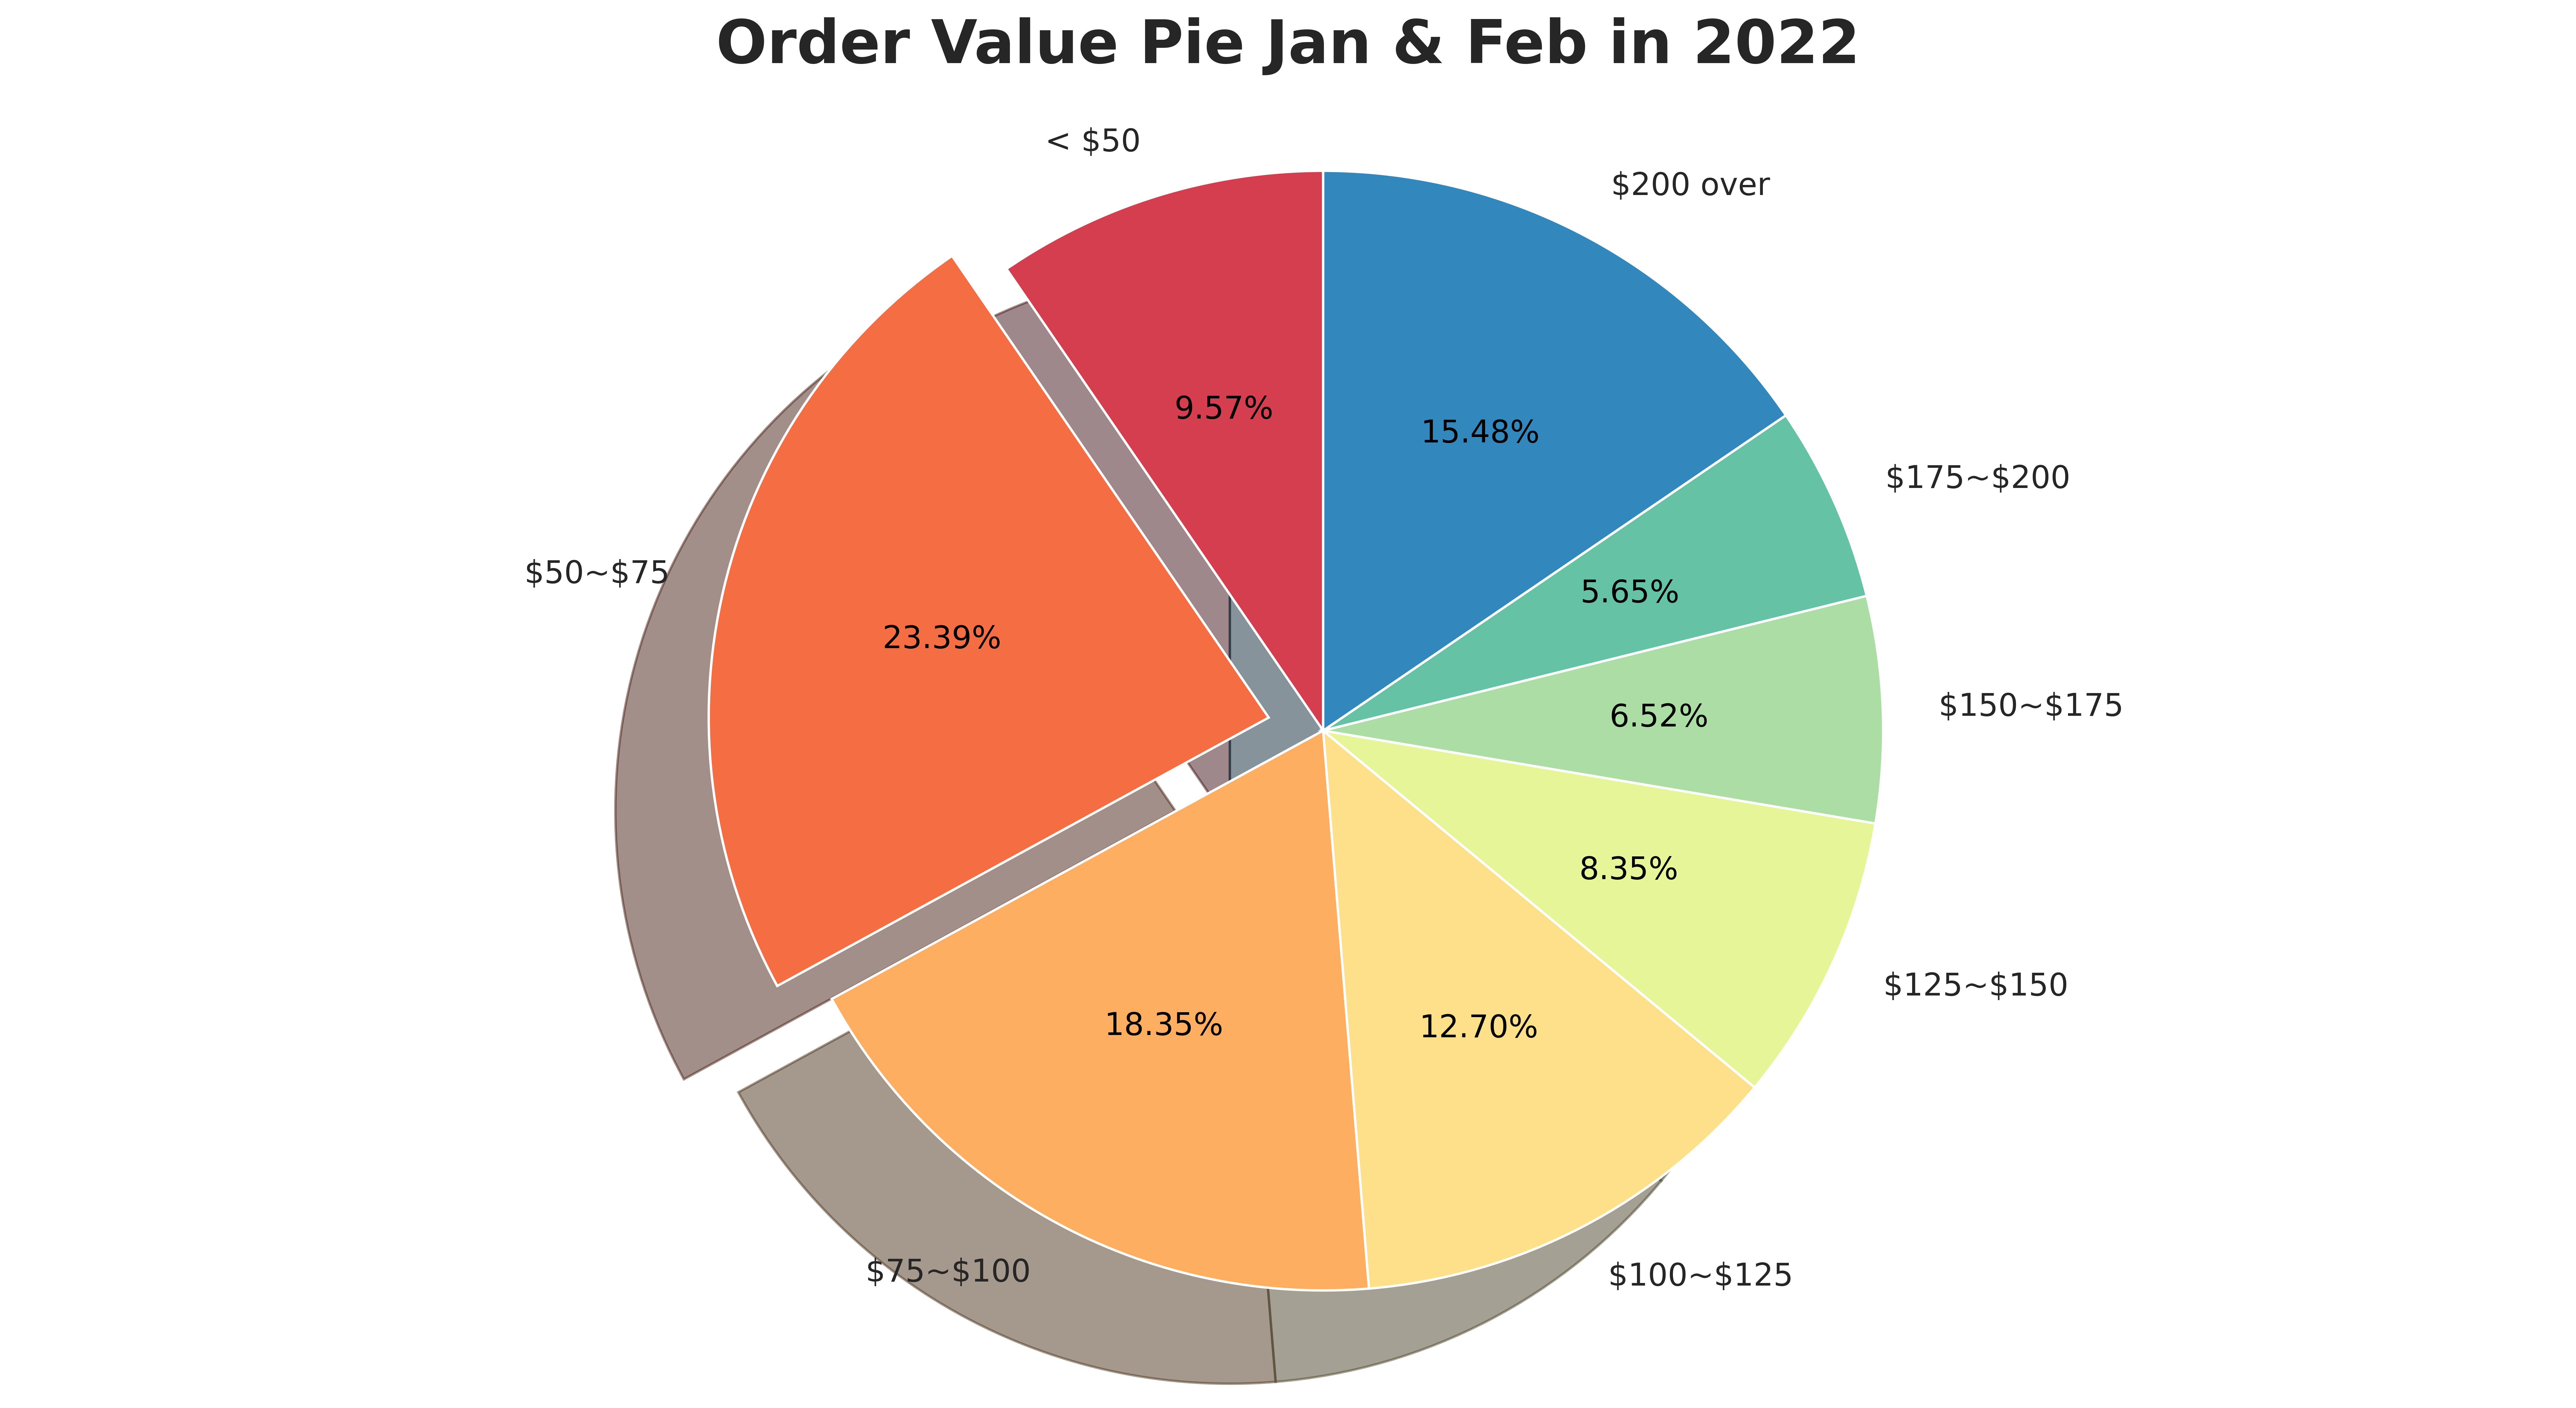

In [306]:
labels2 = ['< $50','\$50~$75',"\$75~$100",'\$100~$125','\$125~$150','\$150~$175','\$175~$200','\$200 over'] 
count2 = [110,269,211,146,96,75,65,178]
color_pie = ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd']
explode = [0,.1,0,0,0,0,0,0]
plt.figure(figsize = (15,8))
patches, texts, autotexts = plt.pie(count2,labels = labels2,wedgeprops = {'linewidth':1,'edgecolor':'white'}, textprops = {'size': 13}, shadow=True,autopct = '%.2f%%',colors = color_pie,explode=explode,startangle=90)
plt.setp(autotexts,color = 'black',size='13')
plt.title('Order Value Pie Jan & Feb in 2022',fontsize=25,fontweight='bold',y=1.03)
plt.axis('equal')
plt.tight_layout()
plt.savefig(f"{root_path}/Order_Value_Pie_JF_2022.png")

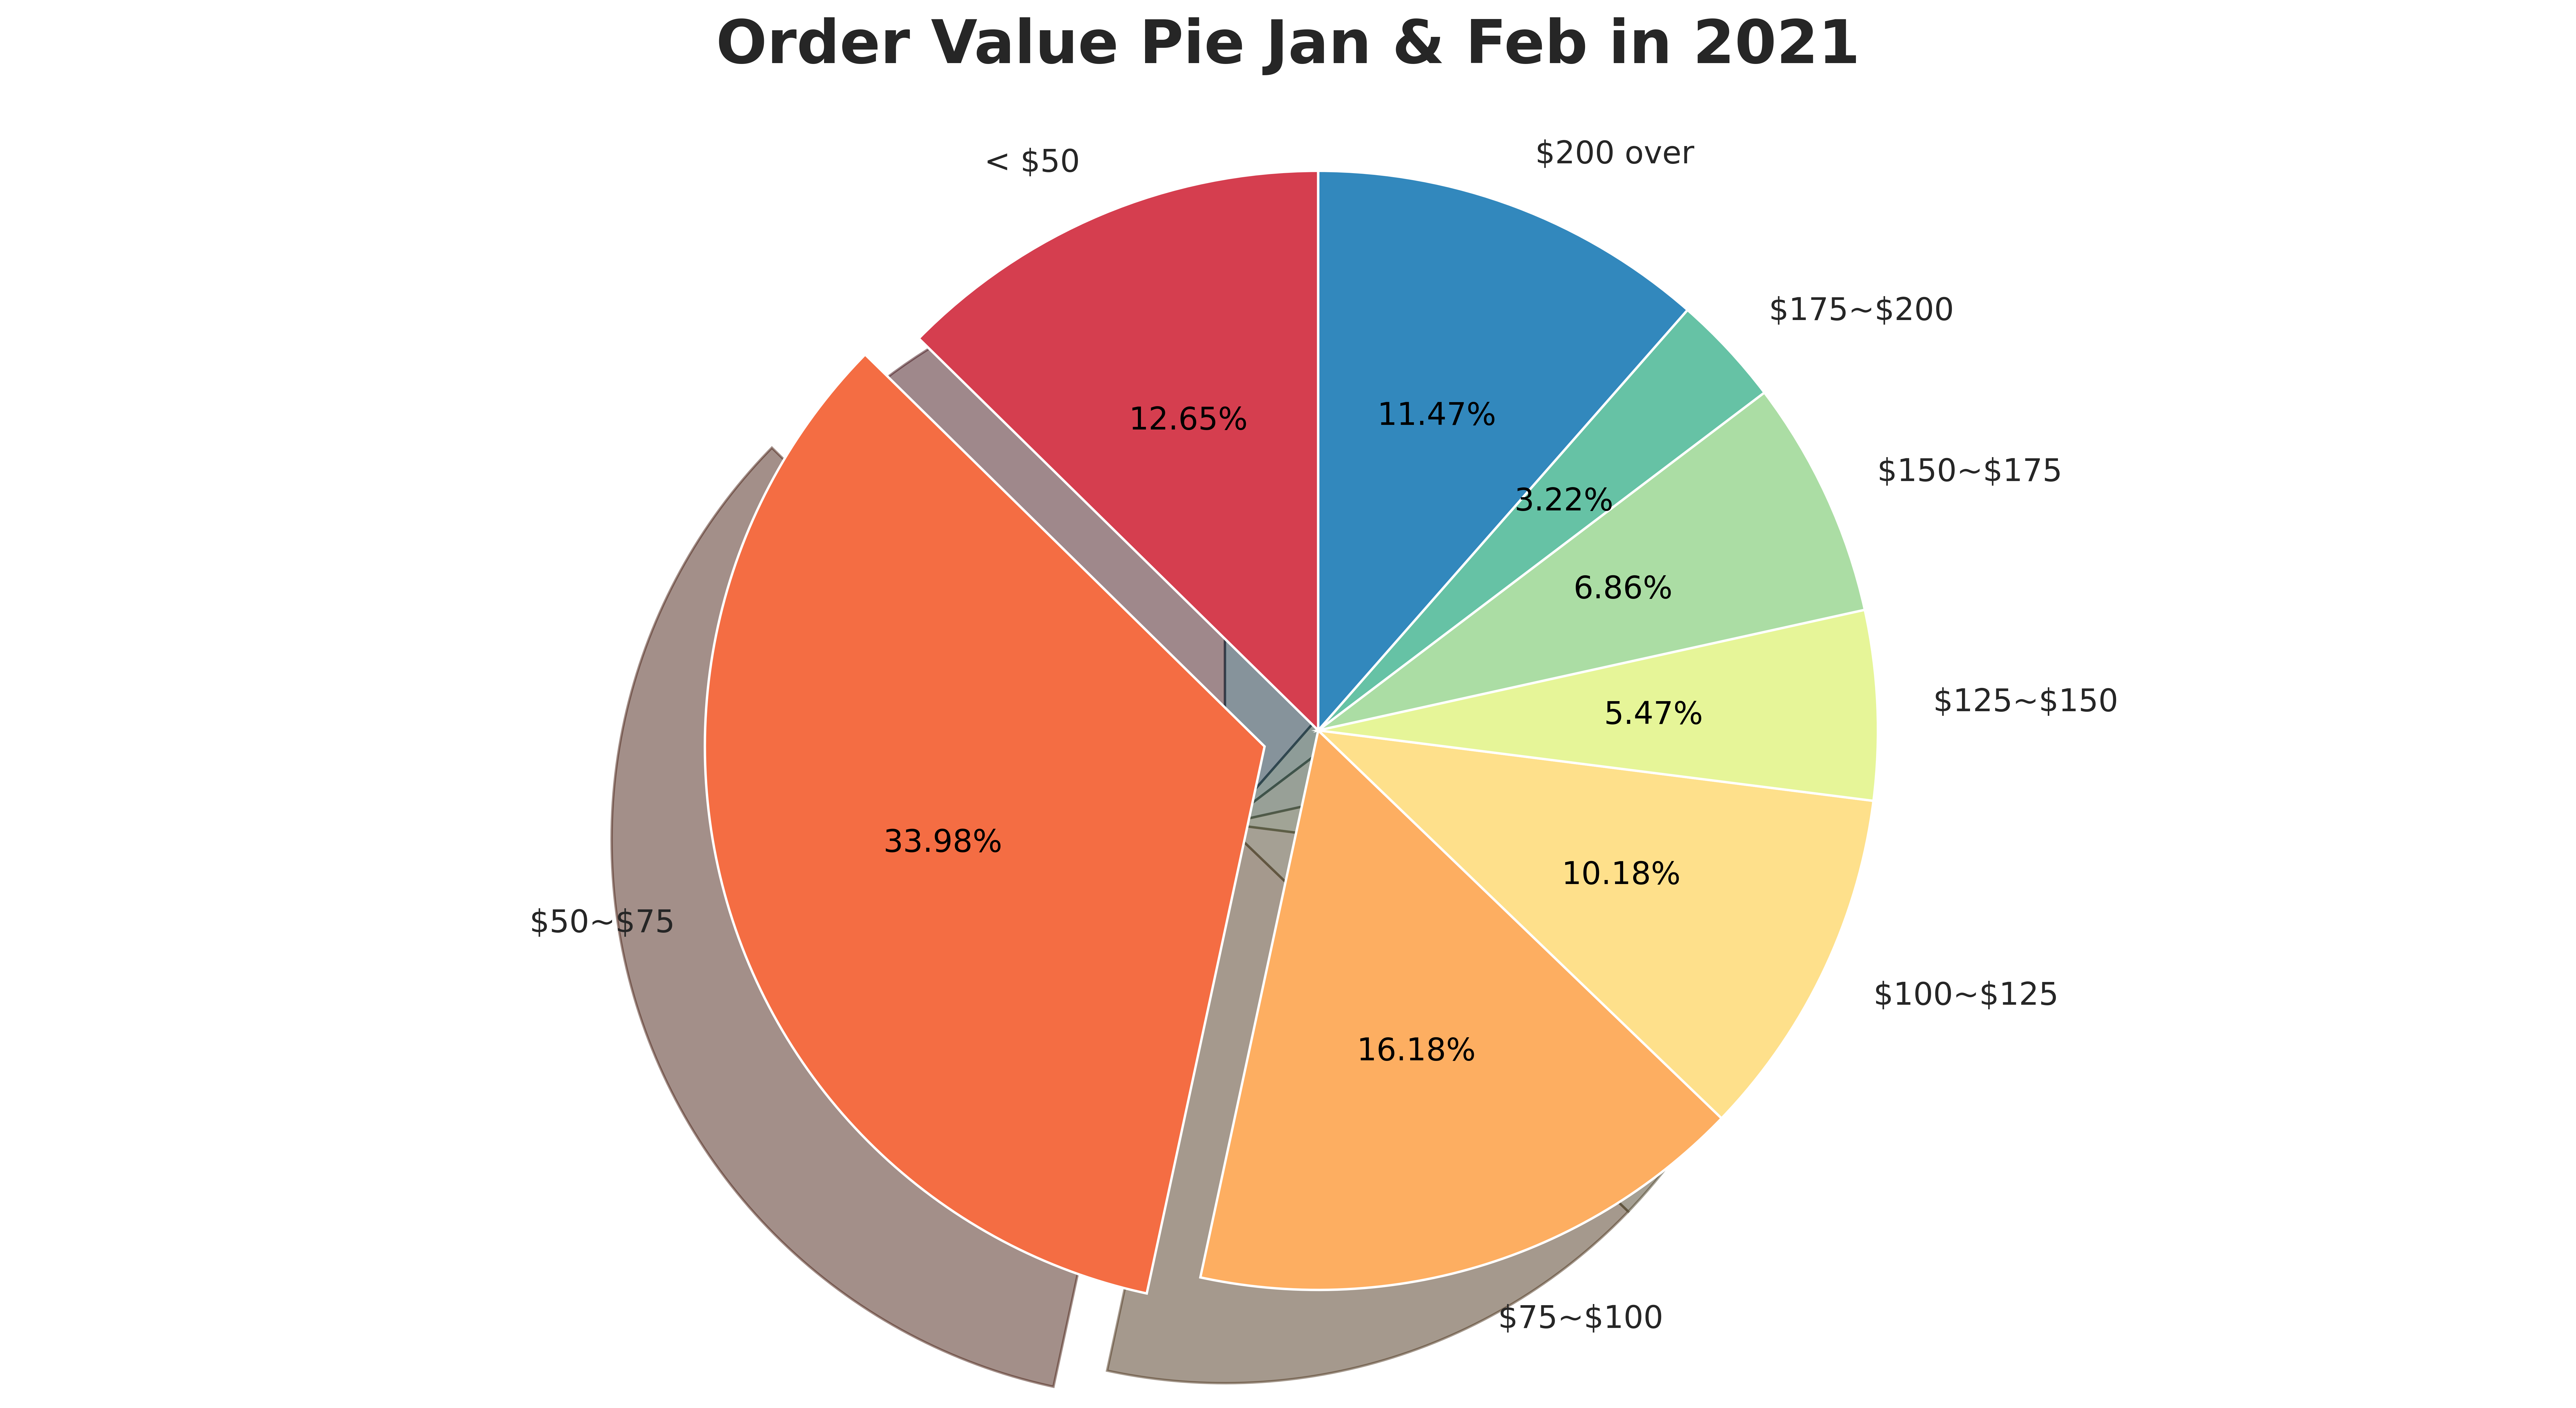

In [307]:
labels2 = ['< $50','\$50~$75',"\$75~$100",'\$100~$125','\$125~$150','\$150~$175','\$175~$200','\$200 over'] 
count3 = [118,317,151,95,51,64,30,107]
color_pie = ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd']
explode = [0,.1,0,0,0,0,0,0]
plt.figure(figsize = (15,8))
patches, texts, autotexts = plt.pie(count3,labels = labels2,wedgeprops = {'linewidth':1,'edgecolor':'white'}, textprops = {'size': 13}, shadow=True,autopct = '%.2f%%',colors = color_pie,explode=explode,startangle=90)
plt.setp(autotexts,color = 'black',size='13')
plt.title('Order Value Pie Jan & Feb in 2021',fontsize=25,fontweight='bold',y=1.03)
plt.axis('equal')
plt.tight_layout()
plt.savefig(f"{root_path}/Order_Value_Pie_JF_2021.png")

# **Insight & Recommendations**
1.	The results confirmed that ecommerce shipping strategy is a key to our online store’s success that can change our consumer behaviors.

2.	We should offer low- priced but appealing accessories (price range \$0 ~ \$25) in order to nudge more customers from the \$50-\$75 bucket to higher buckets beyond \$75 since consumers wouldn’t want to pay more than \$10- \$15 to get free shipping.  However, our current offering under \$100 is as below. Practically, chain extender and 1.2” bead chains are the only valid options to add to their carts considering that the average price in the \$25- \$50 bucket is \$39.43 which is too high. If we can encourage another 10% of the $50 -$75 bucket orders to the \$75 - \$100 by nudging them to buy accessories (\$1 - \$25), then we can have at least $12.5 upsell value per item.  

